WeatherPy - Weather Analysis 

Based on a sample of weather data for 500 random cities we can visualize several different trends globally.

Temperature (F) vs. Latitude
The data for temperature by latitude shows that the warmest weather is centered mostly near the equator.  However looking at the cities that were sampled there is a slight increase in temperature between Latitudes 15-40 that does not appear in Latitudes -15 through -40.



Wind Speed (mph) vs. Latitude

In [1]:
#dependencies
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import pprint
from citipy import citipy

In [2]:
#api keys
from config import WKey
from config import GKey

#style settings for plots
plt.style.use("seaborn")

In [3]:
#Generate random latitudes and longitudes
lat = np.random.uniform(low=-90, high=90, size=2000)
lng = np.random.uniform(low=-180, high=180, size=2000)

#Creating coordinate pairs
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))

In [4]:
#Finding the cities nearest to the coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

In [5]:
#Creating DataFrame
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""

for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code
    
cities_df.head()

,0,City Name,Country Code
0,<citipy.citipy.City object at 0x000001F17C14D668>,sobolevo,ru
1,<citipy.citipy.City object at 0x000001F17BAA4630>,mataura,pf
2,<citipy.citipy.City object at 0x000001F17B87B0B8>,grand river south east,mu
3,<citipy.citipy.City object at 0x000001F17B14E7B8>,cayenne,gf
4,<citipy.citipy.City object at 0x000001F17AB4FF28>,carnarvon,au


In [6]:
#Dropping duplicate cities
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)
cities_df.head()


,index,0,City Name,Country Code
0,0,<citipy.citipy.City object at 0x000001F17C14D668>,sobolevo,ru
1,1,<citipy.citipy.City object at 0x000001F17BAA4630>,mataura,pf
2,2,<citipy.citipy.City object at 0x000001F17B87B0B8>,grand river south east,mu
3,3,<citipy.citipy.City object at 0x000001F17B14E7B8>,cayenne,gf
4,4,<citipy.citipy.City object at 0x000001F17AB4FF28>,carnarvon,au


In [7]:
# Deleting unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

,City Name,Country Code
0,sobolevo,ru
1,mataura,pf
2,grand river south east,mu
3,cayenne,gf
4,carnarvon,au


In [8]:
# Adding columns for values
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sobolevo,ru,,,,,,
1,mataura,pf,,,,,,
2,grand river south east,mu,,,,,,
3,cayenne,gf,,,,,,
4,carnarvon,au,,,,,,


In [9]:
# Accessing data
print("Beginning Data Retrieval")
print("---------------------------------")

for index, row in cities_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], WKey)
   
    # Printing to ensure loop is correct
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    # Running request
    weather_data = requests.get(url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue

print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")



Beginning Data Retrieval
---------------------------------
Now retrieving City #0: sobolevo, ru
http://api.openweathermap.org/data/2.5/weather?q=sobolevo,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #1: mataura, pf
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #2: grand river south east, mu
http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #3: cayenne, gf
http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #4: carnarvon, au
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #5: kodiak, us
http://api.openweathermap.org/data/2.5/weather?q=kodiak,us

Now retrieving City #54: mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #55: yulara, au
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #56: college, us
http://api.openweathermap.org/data/2.5/weather?q=college,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #57: caravelas, br
http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #58: gamba, ga
http://api.openweathermap.org/data/2.5/weather?q=gamba,ga&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #59: kaitangata, nz
http://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #60: aquiraz, br
http://api.openweathermap.org/data/2.5/weather?q=

Now retrieving City #107: sydney, au
http://api.openweathermap.org/data/2.5/weather?q=sydney,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #108: saskylakh, ru
http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #109: talnakh, ru
http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #110: oranjemund, na
http://api.openweathermap.org/data/2.5/weather?q=oranjemund,na&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #111: vaini, to
http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #112: castro, cl
http://api.openweathermap.org/data/2.5/weather?q=castro,cl&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #113: kloulklubed, pw
http://api.openweathermap.org/data/2.5/weath

Now retrieving City #161: osa, ru
http://api.openweathermap.org/data/2.5/weather?q=osa,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #162: chapais, ca
http://api.openweathermap.org/data/2.5/weather?q=chapais,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #163: yerbogachen, ru
http://api.openweathermap.org/data/2.5/weather?q=yerbogachen,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #164: fairlie, nz
http://api.openweathermap.org/data/2.5/weather?q=fairlie,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #165: sentyabrskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #166: torbay, ca
http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving Cit

Now retrieving City #213: greenwood, us
http://api.openweathermap.org/data/2.5/weather?q=greenwood,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #214: fenyi, cn
http://api.openweathermap.org/data/2.5/weather?q=fenyi,cn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #215: duekoue, ci
http://api.openweathermap.org/data/2.5/weather?q=duekoue,ci&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #216: lorengau, pg
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #217: pacifica, us
http://api.openweathermap.org/data/2.5/weather?q=pacifica,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #218: chuy, uy
http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #219: azul, ar
http://api.openweathermap.org/data/2.5/weather?q=azul,a

Now retrieving City #266: jizan, sa
http://api.openweathermap.org/data/2.5/weather?q=jizan,sa&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #267: vao, nc
http://api.openweathermap.org/data/2.5/weather?q=vao,nc&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #268: saint anthony, ca
http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #269: kromy, ru
http://api.openweathermap.org/data/2.5/weather?q=kromy,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #270: east london, za
http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #271: nizhneyansk, ru
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving

Now retrieving City #318: virginia beach, us
http://api.openweathermap.org/data/2.5/weather?q=virginia beach,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #319: pingxiang, cn
http://api.openweathermap.org/data/2.5/weather?q=pingxiang,cn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #320: buraydah, sa
http://api.openweathermap.org/data/2.5/weather?q=buraydah,sa&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #321: wanaka, nz
http://api.openweathermap.org/data/2.5/weather?q=wanaka,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #322: presidencia roque saenz pena, ar
http://api.openweathermap.org/data/2.5/weather?q=presidencia roque saenz pena,ar&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #323: xambioa, br
http://api.openweathermap.org/data/2.5/weather?q=xambioa,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skippi

Now retrieving City #370: katangli, ru
http://api.openweathermap.org/data/2.5/weather?q=katangli,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #371: isangel, vu
http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #372: vanavara, ru
http://api.openweathermap.org/data/2.5/weather?q=vanavara,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #373: ambon, id
http://api.openweathermap.org/data/2.5/weather?q=ambon,id&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #374: clinton, us
http://api.openweathermap.org/data/2.5/weather?q=clinton,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #375: obidos, br
http://api.openweathermap.org/data/2.5/weather?q=obidos,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #376: jamame, so
http://api.openweather

Now retrieving City #424: kahului, us
http://api.openweathermap.org/data/2.5/weather?q=kahului,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #425: mucurici, br
http://api.openweathermap.org/data/2.5/weather?q=mucurici,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #426: san luis, cu
http://api.openweathermap.org/data/2.5/weather?q=san luis,cu&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #427: arrecife, es
http://api.openweathermap.org/data/2.5/weather?q=arrecife,es&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #428: koslan, ru
http://api.openweathermap.org/data/2.5/weather?q=koslan,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #429: atambua, id
http://api.openweathermap.org/data/2.5/weather?q=atambua,id&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #430: olenino, ru
http://api.openweathermap.org/data/2.5/weather

Now retrieving City #477: gurskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=gurskoye,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #478: sompeta, in
http://api.openweathermap.org/data/2.5/weather?q=sompeta,in&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #479: dolbeau, ca
http://api.openweathermap.org/data/2.5/weather?q=dolbeau,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #480: sur, om
http://api.openweathermap.org/data/2.5/weather?q=sur,om&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #481: nyurba, ru
http://api.openweathermap.org/data/2.5/weather?q=nyurba,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #482: gweta, bw
http://api.openweathermap.org/data/2.5/weather?q=gweta,bw&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #483: kazanskaya, 

Now retrieving City #529: codrington, ag
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #530: gao, ml
http://api.openweathermap.org/data/2.5/weather?q=gao,ml&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #531: bay roberts, ca
http://api.openweathermap.org/data/2.5/weather?q=bay roberts,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #532: indianola, us
http://api.openweathermap.org/data/2.5/weather?q=indianola,us&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #533: trinidad, bo
http://api.openweathermap.org/data/2.5/weather?q=trinidad,bo&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #534: san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?q=san cristobal,ec&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #535: palabuh

Now retrieving City #581: babushkin, ru
http://api.openweathermap.org/data/2.5/weather?q=babushkin,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #582: krasnoborsk, ru
http://api.openweathermap.org/data/2.5/weather?q=krasnoborsk,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #583: katherine, au
http://api.openweathermap.org/data/2.5/weather?q=katherine,au&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #584: angoche, mz
http://api.openweathermap.org/data/2.5/weather?q=angoche,mz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #585: ahipara, nz
http://api.openweathermap.org/data/2.5/weather?q=ahipara,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #586: inderborskiy, kz
http://api.openweathermap.org/data/2.5/weather?q=inderborskiy,kz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #587: tahou

Now retrieving City #636: waitati, nz
http://api.openweathermap.org/data/2.5/weather?q=waitati,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #637: yarensk, ru
http://api.openweathermap.org/data/2.5/weather?q=yarensk,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #638: sao mateus, br
http://api.openweathermap.org/data/2.5/weather?q=sao mateus,br&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #639: kautokeino, no
http://api.openweathermap.org/data/2.5/weather?q=kautokeino,no&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #640: carballo, es
http://api.openweathermap.org/data/2.5/weather?q=carballo,es&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #641: pandan, ph
http://api.openweathermap.org/data/2.5/weather?q=pandan,ph&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #642: samalaeulu, ws
http://api.openweathermap.org/data/

Now retrieving City #689: saint-augustin, ca
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #690: chapleau, ca
http://api.openweathermap.org/data/2.5/weather?q=chapleau,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #691: bredy, ru
http://api.openweathermap.org/data/2.5/weather?q=bredy,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #692: isla mujeres, mx
http://api.openweathermap.org/data/2.5/weather?q=isla mujeres,mx&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #693: gravdal, no
http://api.openweathermap.org/data/2.5/weather?q=gravdal,no&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #694: kargopol, ru
http://api.openweathermap.org/data/2.5/weather?q=kargopol,ru&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #695: alpena, us
http://api.openweathermap.o

Now retrieving City #741: luanda, ao
http://api.openweathermap.org/data/2.5/weather?q=luanda,ao&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #742: hokitika, nz
http://api.openweathermap.org/data/2.5/weather?q=hokitika,nz&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #743: el derrumbo, hn
http://api.openweathermap.org/data/2.5/weather?q=el derrumbo,hn&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Error with city data. Skipping
Now retrieving City #744: stornoway, gb
http://api.openweathermap.org/data/2.5/weather?q=stornoway,gb&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #745: saint-ambroise, ca
http://api.openweathermap.org/data/2.5/weather?q=saint-ambroise,ca&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #746: sri aman, my
http://api.openweathermap.org/data/2.5/weather?q=sri aman,my&units=imperial&appid=f3dcb25fbddf85b3b397c8fc359b97fe
Now retrieving City #747: bel

In [10]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df = cities_df.head(500)
cities_df.describe

<bound method NDFrame.describe of                   City Name Country Code  Latitude Longitude  Temperature (F)  \
0                  sobolevo           ru     54.43      31.9            64.34   
3                   cayenne           gf      4.94    -52.33            84.20   
4                 carnarvon           au    -24.87    113.63            57.50   
5                    kodiak           us     39.95    -94.76            66.20   
6               port alfred           za    -33.59     26.89            62.45   
7                    albany           au    -35.02    117.88            48.86   
8                  havelock           us     34.88     -76.9            91.47   
9                      nome           us     30.04    -94.42            84.61   
10                ust-kuyga           ru     70.00    135.55            61.01   
11                  qaanaaq           gl     77.48    -69.36            30.95   
12                   ghanzi           bw    -21.70     21.65            50.

In [11]:
# Exporting DataFrame
cities_df.to_csv("weather_info.csv")

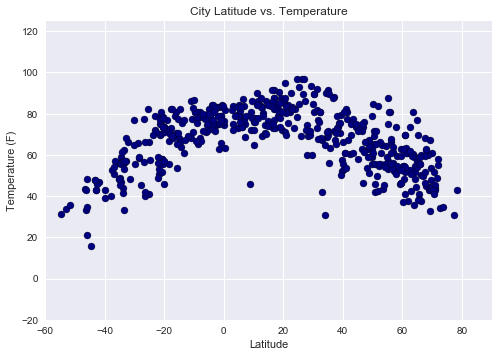

In [12]:
#Latitude vs Teperature Plot

# Axes values# Axes  
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature (F)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

plt.savefig("LatitudeVsTemperature.png")
plt.show()

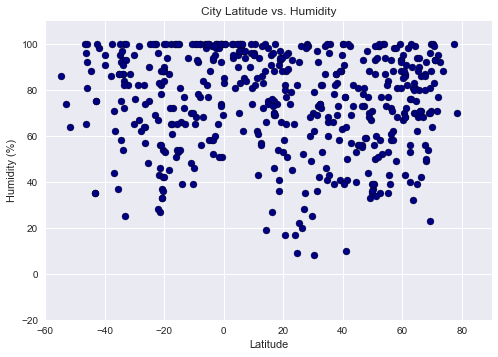

In [17]:
#Latitude vs Humidity

# Axes values# Axes  
x_axis = cities_df['Latitude']
y_axis = cities_df['Humidity (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,110)

plt.savefig("LatitudeVsHumidity.png")
plt.show()

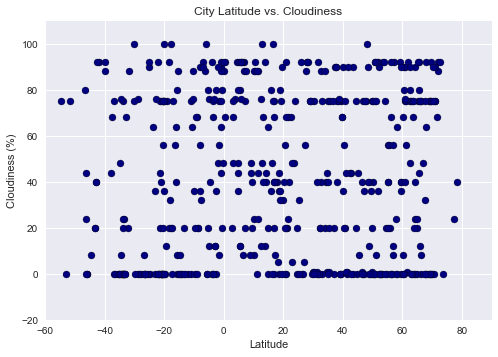

In [14]:
#Latitude vs Cloudiness
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Cloudiness (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,110)

plt.savefig("LatitudeVsCloudiness.png")
plt.show()

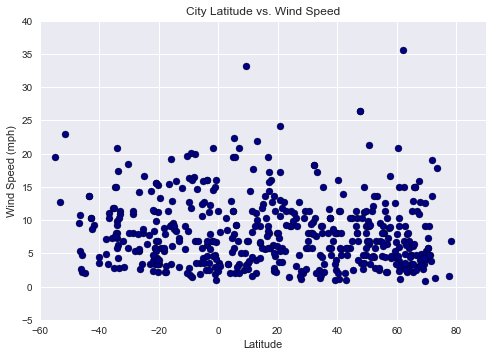

In [15]:
#Latitude vs Wind Speed
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Wind Speed (mph)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

plt.savefig("LatitudeVsWindSpeed.png")
plt.show()